<a href="https://colab.research.google.com/github/ngthvan02/AI/blob/main/BTVN_MNIST_FASHION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

<ipython-input-14-700819040411>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


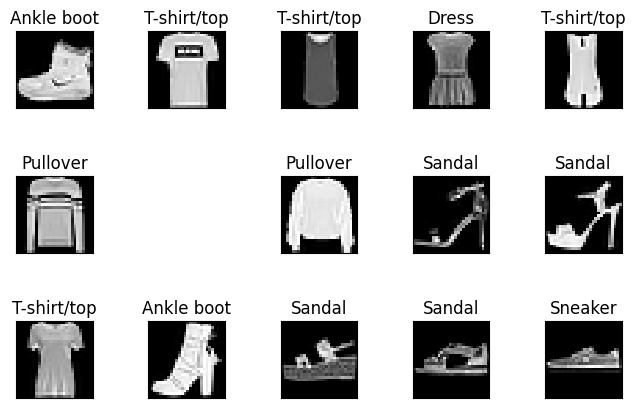

In [14]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('{}'.format(class_name[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])

In [15]:
train_images = train_images.reshape((60000,28*28)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000, 28*28)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(60000, 784)

In [16]:
train_labels = keras.utils.to_categorical(train_labels, 10) #One hot encoding
test_labels = keras.utils.to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_shape = (784,), activation='relu', name="Layer_1"))
model.add(Dense(256, activation='relu', name="Layer_2"))
model.add(Dense(128, activation='relu', name="Layer_3"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.5576 - accuracy: 0.7931
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3851 - accuracy: 0.8574
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3388 - accuracy: 0.8720
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3124 - accuracy: 0.8840
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2910 - accuracy: 0.8911
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2781 - accuracy: 0.8949
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2643 - accuracy: 0.9002
Epoch 8/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2527 - accuracy: 0.9040
Epoch 9/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2403 - accuracy: 0.9092
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2346 - accura

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_accuracy",test_acc)
print("test_loss", test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.4308 - accuracy: 0.8674
test_accuracy 0.8673999905586243
test_loss 0.4308491349220276


1/1 [==============================] - 0s 69ms/step


<ipython-input-20-a1b25f1a7fd5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


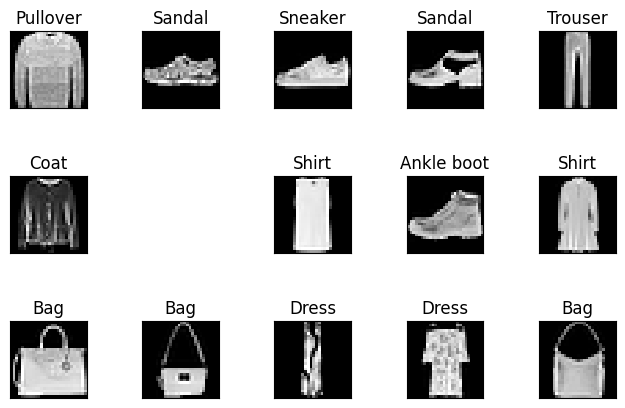

In [20]:
x_sample = test_images[20:35]
pred = np.argmax(model.predict(x_sample), axis=-1)
x_sample = np.reshape(x_sample, (15,28, 28,1))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_sample[i], cmap='gray', interpolation='none')
  plt.title('{}'.format(class_name[pred[i]]))
  plt.xticks([])
  plt.yticks([])